```
LargePrimeNumbers_runtime.ipynb:
Python 3.8.3
CPU 2.00Ghz
Date created: 09/10/2021
Ithar Khaterchi MR2NN
```
<b>Prerequisites</b>
```
pip install matplotlib
pip install numpy
pip install scipy  # efficient numerical routines for numerical integration and optimization.
```

In [1]:
import math
import random
from time import process_time_ns
import numpy as np
import matplotlib.pyplot as plt
# Import curve fitting package from scipy
from scipy.optimize import curve_fit

<b>list of prime numbers</b> from 1-->1000 with a step of 10

In [2]:
prime=[] 
for possibleP in range(1,1000,10):
    isPrime=True
    for num in range(2,possibleP):
        if (possibleP % num==0):
            isPrime=False
    if  isPrime:
        prime.append(possibleP)
del prime[0]
print(prime)

[11, 31, 41, 61, 71, 101, 131, 151, 181, 191, 211, 241, 251, 271, 281, 311, 331, 401, 421, 431, 461, 491, 521, 541, 571, 601, 631, 641, 661, 691, 701, 751, 761, 811, 821, 881, 911, 941, 971, 991]


Alice and Bob communication problem

In [3]:
def Bob(N,x) :    
    #c
    for i in range (2,N): 
        global c
        global d
        if math.gcd(i,x)==1:
            c = i
            break
    #d
    for i in range(1,N):
        f = (1+x*i)/c
        if f % int(f)==0:
            d=int(f)
            break
    return c,d

def Alice(N,c):
    global b
    #a
    a_alice = random.randint(1, N-1)

    #b
    b = (a_alice**c) % N
    return a_alice,b

def Comunication(N,d,b):
    a_bob = (b**d)%N
    return a_bob

In [4]:
exetime =[]
n=[]

for i in range(len(prime)-1):
    n.append(i)
    
    N = prime[i]*prime[i+1]
    x = (prime[i]-1)*(prime[i+1]-1)
    Bob(N,x)
    Alice(N,c)
    
    start_time = process_time_ns() #start stopwatch
    Comunication(N,d,b)
    stop_time = process_time_ns() #stop stopwatch
    
    execution_time = stop_time - start_time
    exetime.append(execution_time)

<b>Plot</b> the execution time in function of the number of operations

Text(0.5, 0, 'operation')

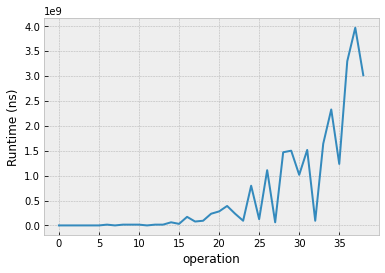

In [5]:
#plot
plt.style.use('bmh')
plt.plot(n, exetime) 
plt.ylabel('Runtime (ns)')
plt.xlabel('operation')

## fitting the plot
Exponential Time complexity O(2^N)

Text(0.5, 0, 'operation')

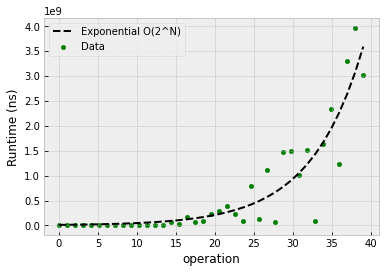

In [6]:
# exponential Function 
def exponential(x, a, b):
    return a*np.exp(b*x)

#data
x_values = np.linspace(start=0, stop=len(exetime), num=len(exetime))
y_values = exetime

#plot
fig, ax = plt.subplots()

# Fit the exponential data
pars, cov = curve_fit(f=exponential, xdata=x_values, ydata=y_values, p0=[0, 0], bounds=(-np.inf, np.inf))
# Plot the original data in scatter
ax.scatter(x_values, y_values, s=20, color='green', label='Data')

# Plot the fit data as an overlay on the scatter data
ax.plot(x_values, exponential(x_values, *pars), linestyle='--', linewidth=2, color='black', label='Exponential O(2^N)')

plt.legend(loc=0)
plt.ylabel('Runtime (ns)')
plt.xlabel('operation')

<b>Conclusion</b>

The larger the prime number, the more complicated and impossible the problem becomes.

In [7]:
print("for the max prime numbers of 2 digits it would take",
      round(pars[0]*np.exp(pars[1]*5)/10**(9)),"seconds")
print("for the max prime numbers of 3 digits it would take",
      round(pars[0]*np.exp(pars[1]*39)/10**(9)),"seconds")
print("for the max prime numbers of 4 digits it would take",
      int(pars[0]*np.exp(pars[1]*305)/(3.154*10**18)),"centuries\n.\n.\n.")

for the max prime numbers of 2 digits it would take 0.0 seconds
for the max prime numbers of 3 digits it would take 4.0 seconds
for the max prime numbers of 4 digits it would take 200849654 centuries
.
.
.
